# Linear Regression TensorFlow 2

## Import Packages

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [4]:
data = pd.read_csv('dataset/moore.csv', header=None).values

In [7]:
X = data[:,0].reshape(-1,1) # reshape to NXD
Y = data[:,1] 

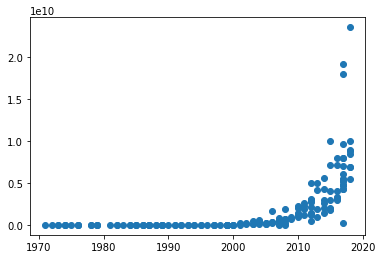

In [8]:
plt.scatter(X,Y);

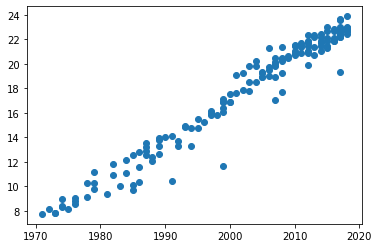

In [9]:
# lets take the log of Y to make thhis linear(from exponential)
Y = np.log(Y)
plt.scatter(X,Y);

In [10]:
# standardize X
X = X - X.mean()

## Model building

In [11]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(1)
])

In [17]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss='mse') #use instead of adam

In [18]:
# learning rate scheduler
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

In [19]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

## Train

In [20]:
r = model.fit(X,Y,epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 651us/step - loss: 353.6131
Epoch 2/200
6/6 [==============================] - 0s 762us/step - loss: 312.3161
Epoch 3/200
6/6 [==============================] - 0s 668us/step - loss: 321.4517
Epoch 4/200
6/6 [==============================] - 0s 675us/step - loss: 340.0604
Epoch 5/200
6/6 [==============================] - 0s 817us/step - loss: 201.5656
Epoch 6/200
6/6 [==============================] - 0s 699us/step - loss: 181.0785
Epoch 7/200
6/6 [==============================] - 0s 798us/step - loss: 106.3270
Epoch 8/200
6/6 [==============================] - 0s 768us/step - loss: 95.7519
Epoch 9/200
6/6 [==============================] - 0s 861us/step - loss: 64.0149
Epoch 10/200
6/6 [==============================] - 0s 708us/step - loss: 81.9617
Epoch 11/200
6/6 [==============================] - 0s 832us/step - loss: 31.8610
Epoch 12/200
6/6 [==============================] - 0s 810us/step - loss: 24.6042
Epoch 13/200
6/6 [

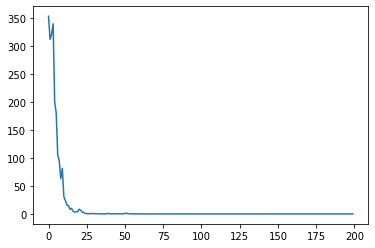

In [21]:
plt.plot(r.history['loss'], label='Loss')

In [22]:
# get model weights and bias
print(model.layers)

In [24]:
print(model.layers[0].get_weights())

[array([[0.33256042]], dtype=float32), array([17.761395], dtype=float32)]


## Making Predictions

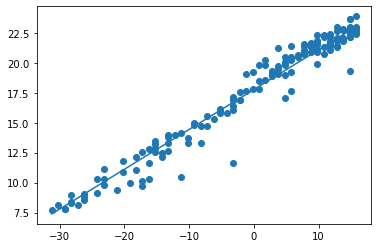

In [26]:
yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,yhat);